In [2]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [3]:
df = pd.read_csv("result_RIOT.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,kaspar@schleiser.de,stephan@mango.localdomain,zeisberg@mi.fu-berlin.de,oleg@hobbykeller.org,oleg@hobbykeller.org.1,mlenders@inf.fu-berlin.de,Oliver.Gesch@Googlemail.com,Oliver@Oliver-PC,eric.engel@fu-berlin.de,...,miquel.borrell@haw-hamburg.de,jason.parker@bissell.com,W_Armin@gmx.de,khjo@itu.dk,34810600+xnumad@users.noreply.github.com,khjo@itu.dk.1,charradamyriam@gmail.com,stemschmidt@gmail.com,lars.pfau@haw-hamburg.de.2,steve@srpalmer.me.uk
0,sys/lib,0.000000,0.0,0.0,25.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sys/lib/ringbuffer.c,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sys/shell,0.000000,0.0,0.0,6.504065,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sys/shell/shell.c,33.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sys/net,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.127877,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,pkg/littlefs2/fs/littlefs2_fs.c,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1684,pkg/lvgl,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,pkg/lvgl/contrib,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1686,pkg/lvgl/contrib/lvgl.c,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['kaspar@schleiser.de', 'stephan@mango.localdomain', 'zeisberg@mi.fu-berlin.de', 'oleg@hobbykeller.org', 'oleg@hobbykeller.org.1', 'mlenders@inf.fu-berlin.de', 'Oliver.Gesch@Googlemail.com', 'Oliver@Oliver-PC', 'eric.engel@fu-berlin.de', 'julian.schueler@googlemail.com', 'arndt.stephan@gmail.com', 'benpicco@zedat.fu-berlin.de', 'oleg@hobbykeller.org.2', 'ludwig.ortmann@fu-berlin.de', 'sir.enmity@gmail.com', 'mail@martin-lenders.de', 'thomas.eichinger1@gmail.com', 'martin.landsmann@haw-hamburg.de', 'mehlis@inf.fu-berlin.de', 'babel@inf.fu-berlin.de', 'rene.kijewski@fu-berlin.de', 'rene.kijewski@fu-berlin.de.1', 'alaeddine.weslati@inria.fr', 'authmill@datalove.me', 'zkasmi@inf.fu-berlin.de', 'zkasmi@inf.fu-berlin.de.1', 'Zakaria.Kasmi@fu-berlin.de', 'Kevin.Roussel@inria.fr', 'heiner.perrey@haw-hamburg.de', 'hauke.petersen@fu-berlin.de', 'h.v.bruinehsen@fu-berlin.de', 'benpicco@zedat.fu-berlin.de.1', 'fabbrandt@gmail.com', 'Martin.Landsmann@HAW-Hamburg.de', 'Martin.Landsmann@HAW-Hamburg.d

In [5]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")

Total de responsáveis por arquivos: 82


In [13]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 371


In [6]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_RIOT.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_RIOT.csv


In [7]:
data = pd.read_csv("contagem_arquivos_por_responsavel_RIOT.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,kaspar@schleiser.de,62
1,stephan@mango.localdomain,0
2,zeisberg@mi.fu-berlin.de,5
3,oleg@hobbykeller.org,24
4,oleg@hobbykeller.org.1,0
...,...,...
366,khjo@itu.dk.1,0
367,charradamyriam@gmail.com,0
368,stemschmidt@gmail.com,0
369,lars.pfau@haw-hamburg.de.2,0


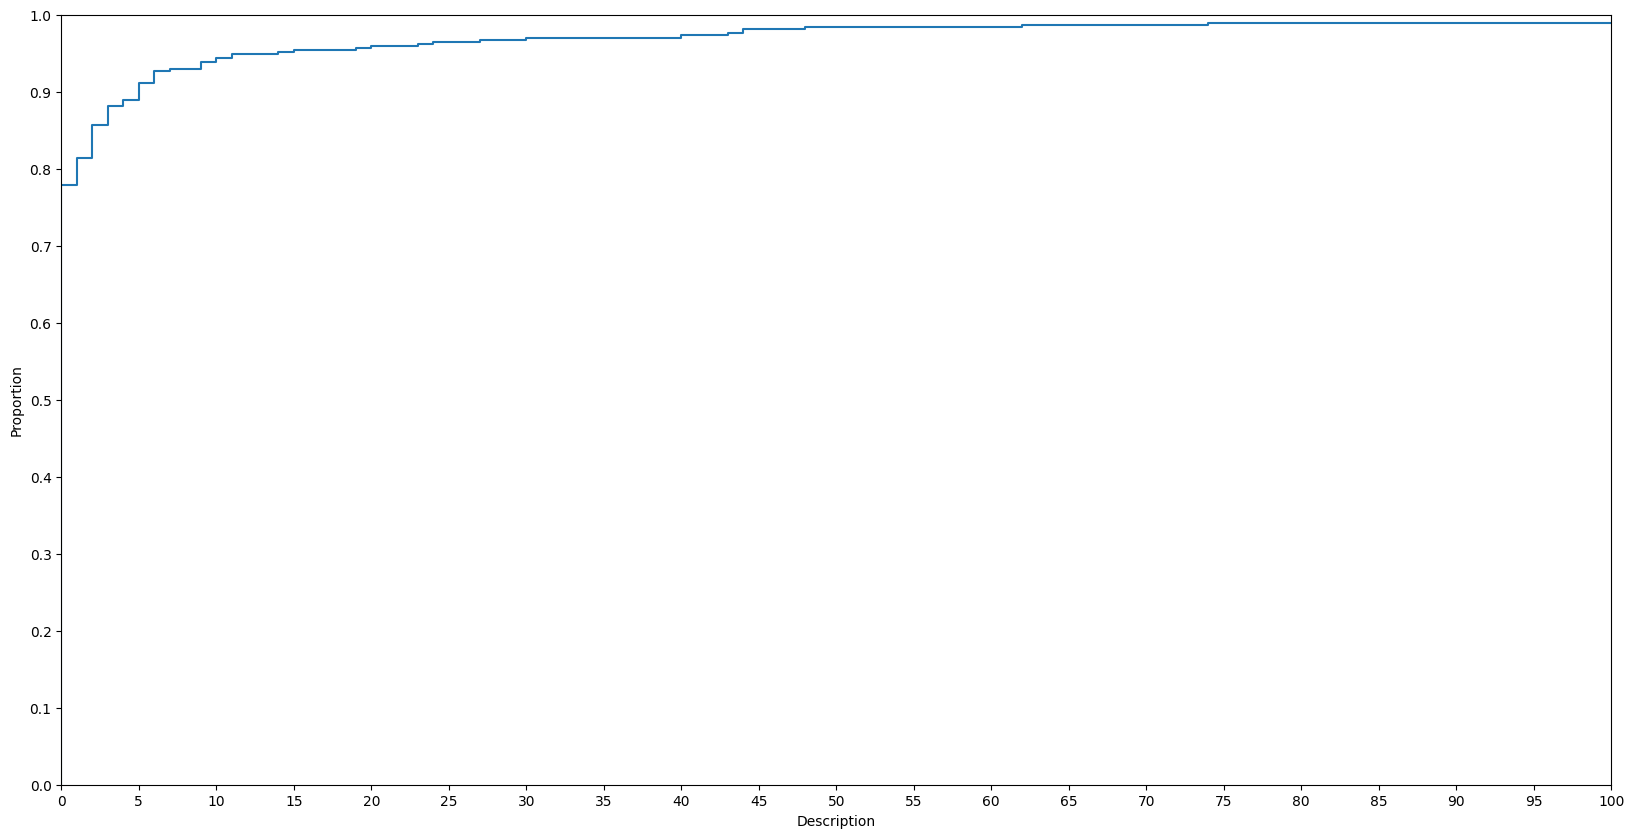

In [8]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  # Ajuste os valores conforme necessário

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

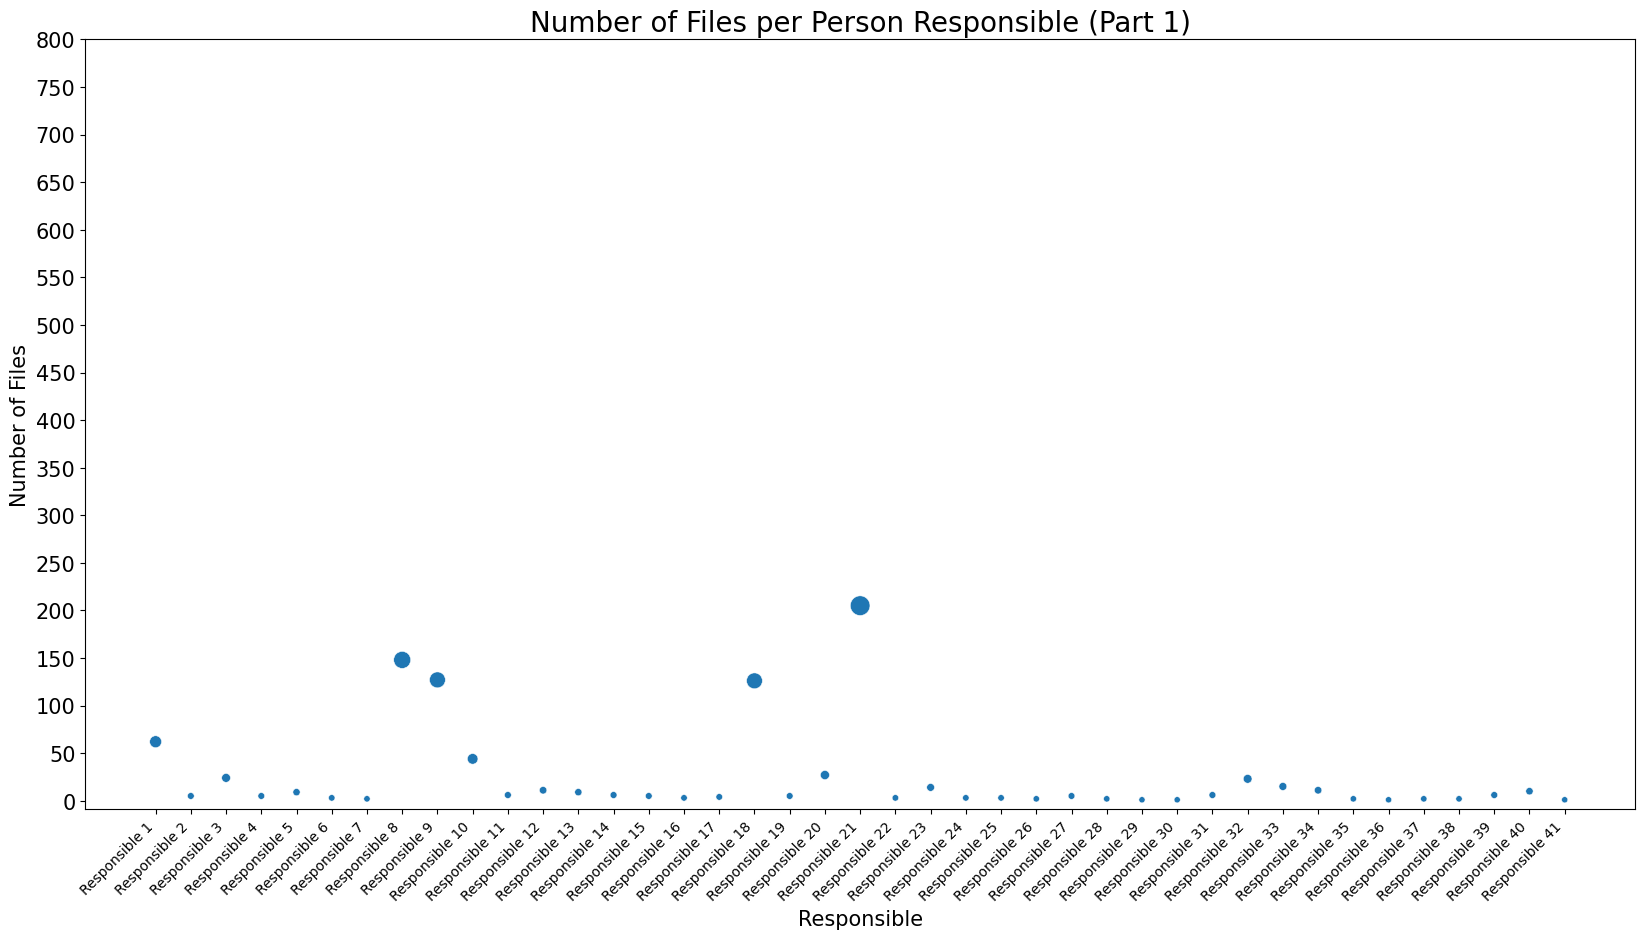

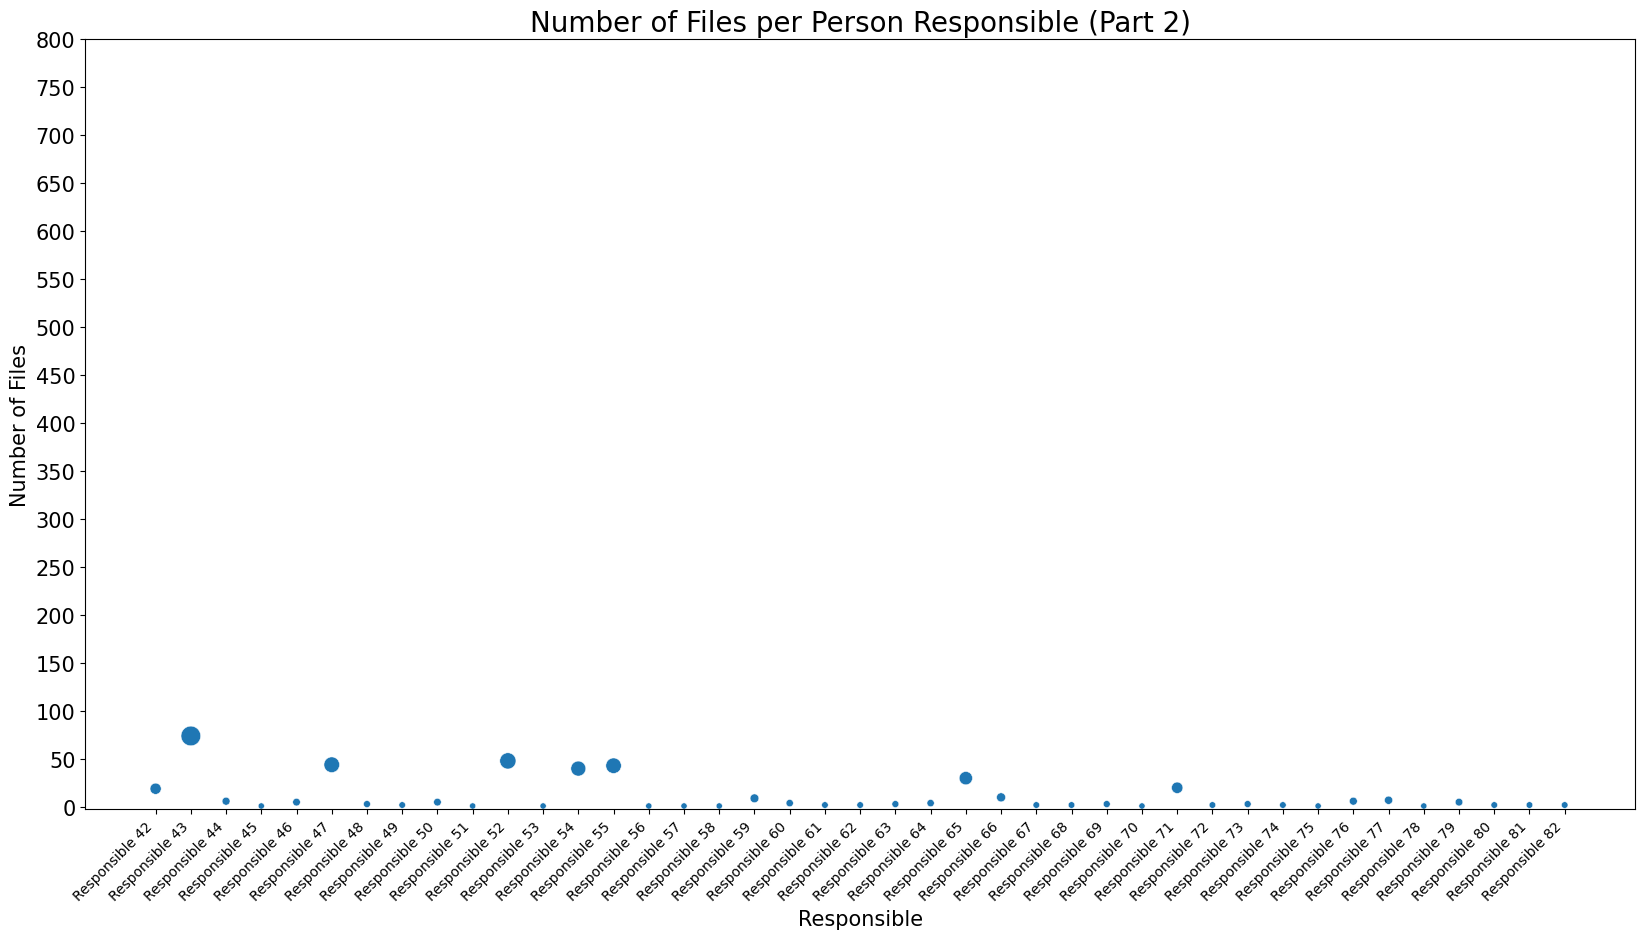

In [9]:
# Filtrar os dados para mostrar apenas aqueles com mais de 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Dividir os dados em dois subconjuntos
middle_index = len(filtered_data) // 2
data_part1 = filtered_data.iloc[:middle_index]
data_part2 = filtered_data.iloc[middle_index:]

# Gráficos de dispersão para cada subconjunto
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part1, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 1)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)


plt.show()


plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part2, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 2)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

plt.show()

In [10]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_RIOT.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_RIOT.csv


In [11]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_RIOT.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,sys/shell/shell.c,3
1,sys/auto_init,5
2,sys/auto_init/auto_init.c,3
3,sys/ps,4
4,sys/ps/ps.c,3
...,...,...
912,drivers/nrf24l01p_ng,1
913,pkg/tlsf,1
914,pkg/tlsf/contrib,1
915,examples/gnrc_networking_mac,1


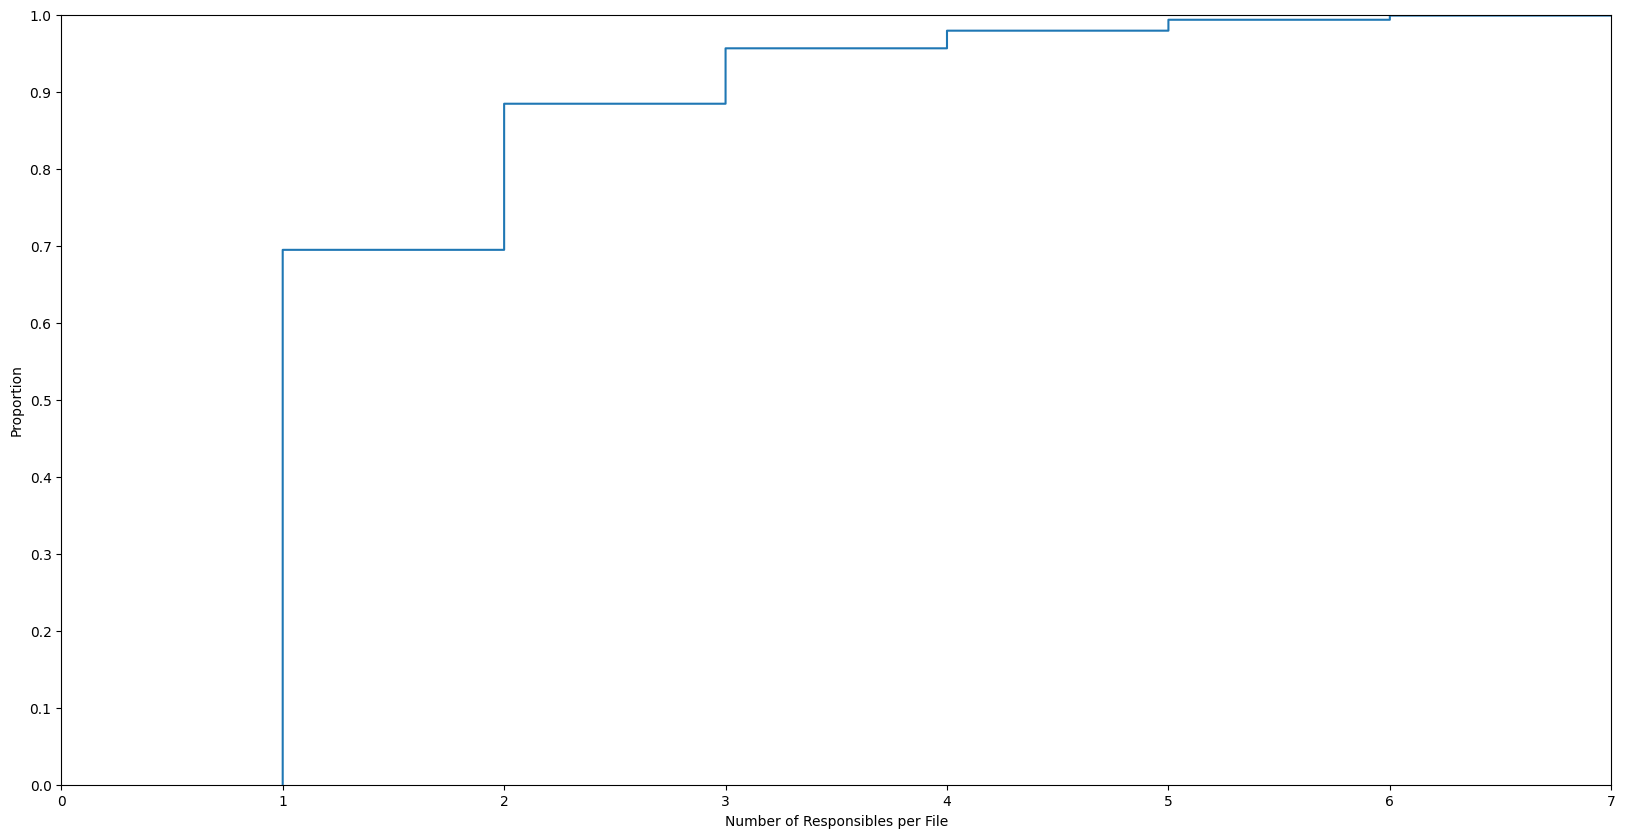

In [12]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, max(data_responsaveis['Contagem']))  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, max(data_responsaveis['Contagem'])+1, 1))

# Exibir o gráfico
plt.show()